In [59]:
from ibm_watsonx_ai import APIClient
import os
from dotenv import load_dotenv
from ibm_watsonx_ai.experiment import TuneExperiment


# Load Environment Variables
load_dotenv()

True

In [60]:
wml_credentials = {
    "url": os.getenv("WATSONX_URL"),            # WatsonX URL
    "apikey": os.getenv("WATSONX_API_KEY")
}

In [61]:
client = APIClient(
    credentials=wml_credentials,
    icp=False    # Important: IBM Cloud, not Cloud Pak
)

In [62]:
client.set.default_project(os.getenv("WATSONX_PROJECT_ID"))
project_id = "d0c2d56e-8ad1-49af-9e96-18a0648470ee"
print(project_id)

d0c2d56e-8ad1-49af-9e96-18a0648470ee


In [63]:
# Check which models support prompt tuning
prompt_tuning_models = client.foundation_models.get_model_specs_with_prompt_tuning_support()

# Print available models
if prompt_tuning_models.get("resources"):
    print("Models available for Prompt Tuning:")
    for model in prompt_tuning_models["resources"]:
        print(f"- {model['model_id']} - {model.get('name', model['model_id'])}")
else:
    print("No models available for Prompt Tuning in your plan.")



Models available for Prompt Tuning:
- google/flan-t5-xl - google/flan-t5-xl
- ibm/granite-13b-instruct-v2 - ibm/granite-13b-instruct-v2
- meta-llama/llama-2-13b-chat - meta-llama/llama-2-13b-chat


In [64]:
asset_id = "34faf29e-7d68-48f2-a900-b1973a0e751c"

In [65]:
from ibm_watsonx_ai.helpers import DataConnection

data_conn = DataConnection(data_asset_id=asset_id)

In [66]:
from ibm_watsonx_ai.experiment import TuneExperiment

experiment = TuneExperiment(wml_credentials, project_id)

In [67]:
{task.name: task.value for task in experiment.Tasks}

{'QUESTION_ANSWERING': 'question_answering',
 'SUMMARIZATION': 'summarization',
 'RETRIEVAL_AUGMENTED_GENERATION': 'retrieval_augmented_generation',
 'CLASSIFICATION': 'classification',
 'GENERATION': 'generation',
 'CODE_GENERATION_AND_CONVERSION': 'code',
 'EXTRACTION': 'extraction',
 'TRANSLATION': 'translation',
 'FUNCTION_CALLING': 'function_calling',
 'CODE_GENERATION': 'code-generation',
 'CODE_EXPLANATION': 'code-explanation',
 'CODE_FIXING': 'code-fixing'}

In [11]:
prompt_tuner = experiment.prompt_tuner(
    name="granite-13b-instruct-v2 prompt tuning - stakeholder management",
    task_id=experiment.Tasks.GENERATION,
    base_model='ibm/granite-13b-instruct-v2',
    accumulate_steps=8,
    batch_size=7,
    learning_rate=0.0002,
    max_input_tokens=128,
    max_output_tokens=200,
    num_epochs=7,
    tuning_type=experiment.PromptTuningTypes.PT,  
    init_text="Answer the stakeholder management question concisely:",
    init_method="text",
    auto_update_model=True
)



In [12]:
prompt_tuner.get_params()

{'base_model': {'model_id': 'ibm/granite-13b-instruct-v2'},
 'accumulate_steps': 8,
 'batch_size': 7,
 'init_method': 'text',
 'init_text': 'Answer the stakeholder management question concisely:',
 'learning_rate': 0.0002,
 'max_input_tokens': 128,
 'max_output_tokens': 200,
 'num_epochs': 7,
 'task_id': 'generation',
 'tuning_type': 'prompt_tuning',
 'name': 'granite-13b-instruct-v2 prompt tuning - stakeholder management',
 'description': 'Prompt tuning with SDK',
 'auto_update_model': True,
 'group_by_name': False}

In [13]:
tuning_details = prompt_tuner.run(training_data_references=[data_conn], background_mode=False)



##############################################

Running '843ed1f5-0929-4cec-95a3-ca18137c3a2f'

##############################################


pending.....
running.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [14]:
prompt_tuner.get_run_details()

{'metadata': {'created_at': '2025-06-12T23:11:19.040Z',
  'description': 'Prompt tuning with SDK',
  'id': '843ed1f5-0929-4cec-95a3-ca18137c3a2f',
  'modified_at': '2025-06-13T01:22:12.144Z',
  'name': 'granite-13b-instruct-v2 prompt tuning - stakeholder management',
  'project_id': 'd0c2d56e-8ad1-49af-9e96-18a0648470ee',
  'tags': ['prompt_tuning',
   'wx_prompt_tune.44b521f2-1a29-4704-b70d-59a9a70c494c']},
 'entity': {'auto_update_model': True,
  'description': 'Prompt tuning with SDK',
  'model_id': '375301ab-a3f7-4aeb-9505-ab80cd081369',
  'name': 'granite-13b-instruct-v2 prompt tuning - stakeholder management',
  'project_id': 'd0c2d56e-8ad1-49af-9e96-18a0648470ee',
  'prompt_tuning': {'accumulate_steps': 8,
   'base_model': {'model_id': 'ibm/granite-13b-instruct-v2'},
   'batch_size': 7,
   'init_method': 'text',
   'init_text': 'Answer the stakeholder management question concisely:',
   'learning_rate': 0.0002,
   'max_input_tokens': 128,
   'max_output_tokens': 200,
   'num_epo

In [15]:
prompt_tuner.summary()

,Enhancements,Base model,Auto store,Epochs,loss
Model Name,,,,,
model_843ed1f5-0929-4cec-95a3-ca18137c3a2f,[prompt_tuning],ibm/granite-13b-instruct-v2,True,7,0.560575


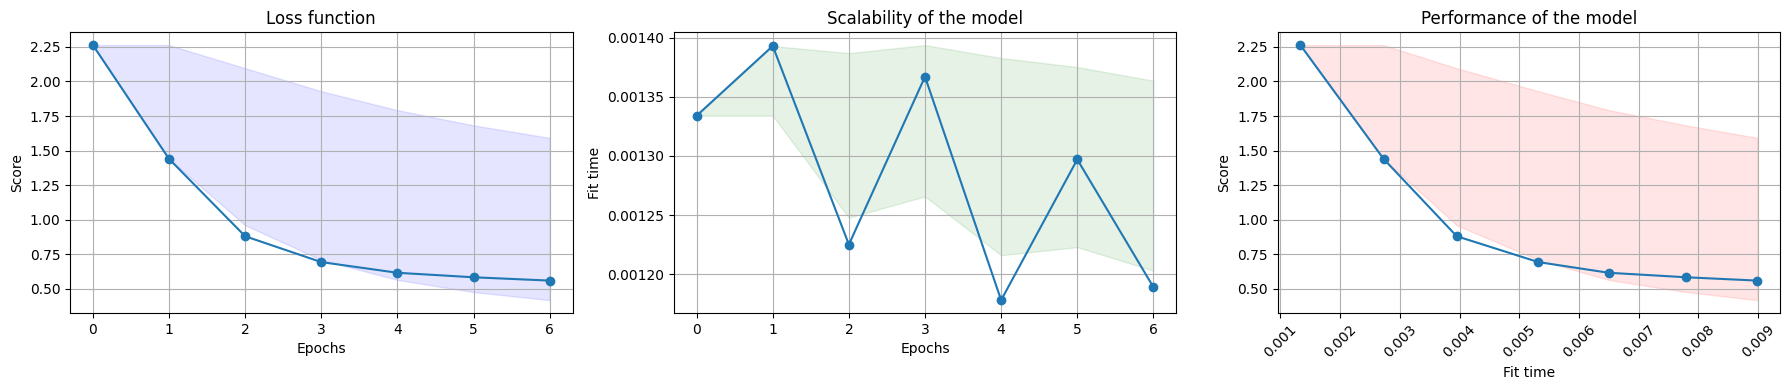

In [16]:
import matplotlib
prompt_tuner.plot_learning_curve()

In [17]:
model_id = "model_ff5659fd-d346-4220-82ff-69b5745242bc"

if 'model_id' in tuning_details.get('entity', {}):
    model_id = tuning_details['entity']['model_id']
model_id

'375301ab-a3f7-4aeb-9505-ab80cd081369'

In [19]:
from datetime import datetime
meta_props = {
    client.deployments.ConfigurationMetaNames.NAME: "PT DEPLOYMENT SDK - IBM Granite - Fine tuned",
    client.deployments.ConfigurationMetaNames.ONLINE: {},
    client.deployments.ConfigurationMetaNames.SERVING_NAME : f"pt_sdk_deployment_{datetime.utcnow().strftime('%Y_%m_%d_%H%M%S')}"
}
deployment_details = client.deployments.create(model_id, meta_props)

C:\Users\USER\AppData\Local\Temp\ipykernel_21912\1900128606.py:5: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  client.deployments.ConfigurationMetaNames.SERVING_NAME : f"pt_sdk_deployment_{datetime.utcnow().strftime('%Y_%m_%d_%H%M%S')}"




######################################################################################

Synchronous deployment creation for id: '375301ab-a3f7-4aeb-9505-ab80cd081369' started

######################################################################################


initializing................
ready


-----------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_id='7303cc41-f661-4ba0-960f-9bb6fcb8d0a8'
-----------------------------------------------------------------------------------------------




In [20]:
deployment_details

{'entity': {'asset': {'id': '375301ab-a3f7-4aeb-9505-ab80cd081369'},
  'base_model_id': 'ibm/granite-13b-instruct-v2',
  'chat_enabled': False,
  'custom': {},
  'deployed_asset_type': 'prompt_tune',
  'name': 'PT DEPLOYMENT SDK - IBM Granite - Fine tuned',
  'online': {'parameters': {'serving_name': 'pt_sdk_deployment_2025_06_13_014413'}},
  'project_id': 'd0c2d56e-8ad1-49af-9e96-18a0648470ee',
  'status': {'inference': [{'url': 'https://us-south.ml.cloud.ibm.com/ml/v1/deployments/pt_sdk_deployment_2025_06_13_014413/text/generation',
     'uses_serving_name': True},
    {'sse': True,
     'url': 'https://us-south.ml.cloud.ibm.com/ml/v1/deployments/pt_sdk_deployment_2025_06_13_014413/text/generation_stream',
     'uses_serving_name': True},
    {'url': 'https://us-south.ml.cloud.ibm.com/ml/v1/deployments/7303cc41-f661-4ba0-960f-9bb6fcb8d0a8/text/generation'},
    {'sse': True,
     'url': 'https://us-south.ml.cloud.ibm.com/ml/v1/deployments/7303cc41-f661-4ba0-960f-9bb6fcb8d0a8/text/gen

In [21]:
deployment_id = deployment_details['metadata']['id']
deployment_id

'7303cc41-f661-4ba0-960f-9bb6fcb8d0a8'

In [70]:
from ibm_watsonx_ai.metanames import GenTextParamsMetaNames as GenParams

generate_params = {
    GenParams.TEMPERATURE: 0,
    GenParams.MAX_NEW_TOKENS: 1000,
    GenParams.DECODING_METHOD: "greedy",
}

In [71]:
from ibm_watsonx_ai.foundation_models import ModelInference

tuned_model = ModelInference(
    model_id="ibm/granite-13b-instruct-v2",
    params=generate_params,
    api_client=client
)

In [ ]:
system_prompt = "You are a leading expert in stakeholder management with extensive experience in complex, multi-stakeholder projects. Provide clear, strategic, and research-informed answers that address the challenges of managing diverse stakeholders across sectors, such as in collaborative initiatives involving industry, academia, and public institutions — for example, Research, Development, and Innovation (RDI) projects. Maintain a professional tone and focus on practical, actionable guidance."

# Questions
prompts = [
    "In large collaborative projects, how can organizations overcome the challenge of aligning different stakeholders with a common vision and strategy?",
    "In collaborative R&D projects, how can organizations prevent conflicts over intellectual property rights among stakeholders?",
    "How should stakeholder conflicts and unexpected changes be managed during project execution?",
    "How can project managers monitor stakeholder satisfaction and engagement throughout the life of a collaborative project?",
    "In collaborative R&D projects involving diverse types of stakeholders, how can organizations overcome the challenge of aligning different competencies, mindsets, and goals toward a common vision?",
    "How can collaborative R&D projects manage the challenge of high stakeholder turnover and resource changes during execution?",
    "How can communication between scientific and business stakeholders be improved in collaborative innovation projects?",
    "How is stakeholder prioritization managed in collaborative R&D projects?",
    "How can teams manage the misalignment of planning horizons and working styles between universities, public institutions, and companies in collaborative R&D?",
    "In collaborative R&D projects involving stakeholders from industry and research, how can organizations handle differences in goals, language, and working pace?",
    "How can stakeholder prioritization be handled in large collaborative projects with varying levels of involvement and risk?",
    "What should be done when stakeholders fail to deliver on agreed commitments during a collaborative project?",
    "How can project teams handle the challenge of keeping industry partners engaged and aligned in high-frequency collaborative workflows?",
    "How can documentation be standardized across diverse stakeholders in large-scale projects?"
]

results = []

for idx, user_question in enumerate(prompts, 1):
    full_prompt = f"{system_prompt}\n\nQuestion: {user_question}"

    response = tuned_model.generate_text(
        prompt=full_prompt
    )
    results.append({
        "Prompt_ID": idx,
        "Prompt": user_question,
        "Response": response
    })
    
    print(f"\n🔹 Prompt - id {idx}: {user_question}")
    print(f"📝 Response - id {idx}: {response}")
    print("-" * 1000)



🔹 Prompt - id 1: In large collaborative projects, how can organizations overcome the challenge of aligning different stakeholders with a common vision and strategy?
📝 Response - id 1: Answer: Develop a clear and concise project vision that articulates the desired outcomes and creates a common goal for all stakeholders. Provide regular updates on the project's progress and involve stakeholders in decision-making processes. Encourage open communication and listening across all stakeholder groups to ensure that their needs and concerns are heard and addressed.
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [82]:
import pandas as pd
from pathlib import Path

df = pd.DataFrame(results)
file_path = "Results_Fine_Tuned.xlsx"
df.to_excel(file_path, index=False)
